Load packages

In [3]:
!pip install pyopenms
!pip install plotly==4.8.0
!pip install matplotlib
!pip install chart-studio
!pip install pandas
import numpy as np
import plotly.graph_objects as go
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import pandas as pd

Read mzML file, which will load the content of the “test.mzML” file into the exp variable of type MSExperiment. 

In [4]:
from pyopenms import *
from urllib.request import urlretrieve
# from urllib import urlretrieve  # use this code for Python 2.x
urlretrieve ("http://proteowizard.sourceforge.net/example_data/small.pwiz.1.1.mzML", "test.mzML")
exp = MSExperiment()
MzMLFile().load("test.mzML", exp)

File preview/inspection (optional)

In [5]:
# get overall info
print ("Number of spectra:", exp.getNrSpectra())
for spec in exp:
  print ("MS Level:", spec.getMSLevel())
print ("Number of chromatograms:", exp.getNrChromatograms())

Number of spectra: 48
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 1
MS Level: 1
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
MS Level: 2
Number of chromatograms: 1


MS Level: 1
RT : 0.4738
Total intensity: 12901288.8718941
Spectrum data: (array([ 200.09090909,  200.18181819,  200.27272728, ..., 1999.81823546,
       1999.90914455, 2000.00005364]), array([449.05173, 626.677  , 727.1613 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32))


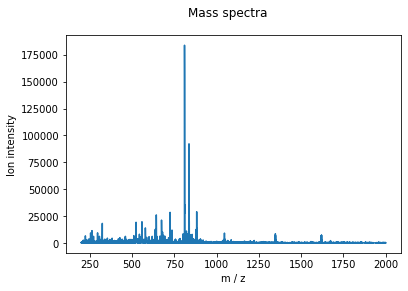

In [6]:
# get specific info of one spectra, in the example spectra [1]
print ("MS Level:", exp[1].getMSLevel())
print("RT :", exp[1].getRT())
spec = exp[1]
mz, intensity = spec.get_peaks()
print ("Total intensity:", sum(intensity))
spectrum_data = exp.getSpectrum(1).get_peaks()
print("Spectrum data:",spectrum_data)
# plot spectra
plt.plot(spectrum_data[0],spectrum_data[1])
plt.xlabel('m / z')
plt.ylabel('Ion intensity')
plt.suptitle('Mass spectra')
plt.show()

Chromatogram data: (array([ 0.2961,  0.4738,  0.6731,  1.3703,  2.0955,  2.9172,  3.7154,
        4.5009,  4.6673,  4.8722,  5.5742,  6.2882,  7.0329,  7.8013,
        8.6071,  8.7845,  8.9853,  9.6865, 10.4022, 11.1995, 12.0417,
       12.8204, 13.0048, 13.2044, 13.9754, 14.6847, 15.5503, 16.3598,
       17.129 , 17.3339, 18.2222, 18.939 , 19.7116, 20.5749, 21.5135,
       21.6857, 21.8853, 22.5947, 23.3204, 24.1177, 24.9079, 25.709 ,
       25.9933, 26.194 , 26.8992, 27.6339, 28.3862, 29.2342]), array([15245068.   , 12901166.   ,   586279.   ,   441570.16 ,
         114331.7  ,   130427.305,   580561.06 , 15148302.   ,
       10349958.   ,   848427.3  ,   456143.44 ,   124170.38 ,
         104264.8  ,   147409.23 , 18257344.   , 11037852.   ,
        1102582.1  ,   360250.97 ,   125874.83 ,   142243.39 ,
         147414.58 , 17613074.   ,  1597410.5  ,   990298.5  ,
         447647.97 ,    71677.03 ,   119999.74 ,   152281.25 ,
       22136832.   , 12434530.   ,   379009.78 ,   12047

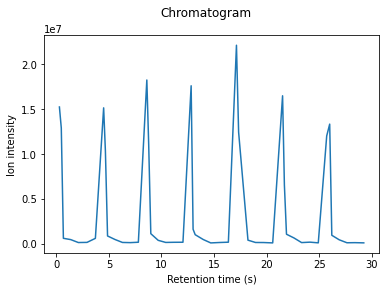

In [7]:
# get specific info of one chromatogram, in the example chromatogram [0]
chromatogram_data = exp.getChromatogram(0).get_peaks()
print("Chromatogram data:",chromatogram_data)
# plot chromatogram (TIC)
plt.plot(chromatogram_data[0],chromatogram_data[1])
plt.xlabel('Retention time (s)')
plt.ylabel('Ion intensity')
plt.suptitle('Chromatogram')
plt.show()

TIC calculation

In [8]:
# Calculates total ion current of an LC-MS/MS experiment
def calcTIC(exp, mslevel):
    tic = 0
    # Iterate through all spectra of the experiment
    for spec in exp:
        # Only calculate TIC for matching (MS1) spectra
        if spec.getMSLevel() == mslevel:
            mz, i = spec.get_peaks()
            tic += sum(i)
    return tic
# For spectra MS1
print ("Total ion current of MS1:",calcTIC(exp, 1))

Total ion current of MS1: 569609042.3306552


Filtering MS1 level only, which will only keep MS1 spectra in the MSExperiment. We can then store the modified data structure on disk

In [9]:
exp_in = MSExperiment()
exp_out = MSExperiment()

MzMLFile().load("test.mzML", exp_in)

chromatogram = MSChromatogram()

spectra_list = list()
chr_rt = list()
chr_i = list()

for s in exp.getSpectra():
    ms_level = s.getMSLevel()
    if ms_level == 1:
        spectra_list.append(s)
        
        rt = s.getRT()
        i = np.max(s.get_peaks()[1])
        
        chr_rt.append(rt)
        chr_i.append(i)
        
chromatogram.set_peaks([chr_rt, chr_i])

exp_out.setSpectra(spectra_list)
exp_out.addChromatogram(chromatogram)

MzMLFile().store("filtered_ms1.mzML", exp_out)

Loading and previewing new filtered file

In [10]:
# load the new file
exp_filtered = MSExperiment()
MzMLFile().load("filtered_ms1.mzML", exp_filtered)
# inspecting the new file
print ("Number of spectra:", exp_filtered.getNrSpectra())

Number of spectra: 14


In [11]:
# new file info for spectra 1
spectrum_data_1 = exp_filtered.getSpectrum(1).get_peaks()
chromatogram_data_1 = exp_filtered.getChromatogram(0).get_peaks()
print("Spectrum data:",spectrum_data_1)
print("Chromatogram data:",chromatogram_data_1)

Spectrum data: (array([ 200.09090909,  200.18181819,  200.27272728, ..., 1999.81823546,
       1999.90914455, 2000.00005364]), array([449.05173, 626.677  , 727.1613 , ...,   0.     ,   0.     ,
         0.     ], dtype=float32))
Chromatogram data: (array([ 0.2961,  0.4738,  4.5009,  4.6673,  8.6071,  8.7845, 12.8204,
       13.0048, 17.129 , 17.3339, 21.5135, 21.6857, 25.709 , 25.9933]), array([1471224.9  ,  183838.72 , 1651648.4  ,  143063.16 , 2027061.1  ,
        134546.1  , 2037945.   ,   20583.182, 2637890.8  ,  189316.16 ,
       1738482.6  ,  105772.07 , 1346706.   ,  174472.94 ], dtype=float32))


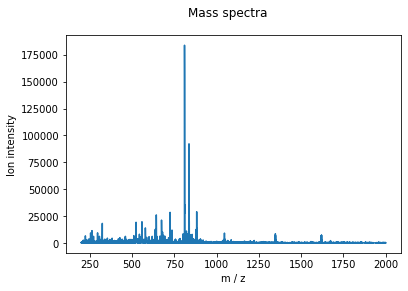

In [12]:
# plotting MS1 spectra for spectra 1
plt.plot(spectrum_data_1[0],spectrum_data_1[1])
plt.xlabel('m / z')
plt.ylabel('Ion intensity')
plt.suptitle('Mass spectra')
plt.show()

In [13]:
# plotting interactive MS1 spectra for spectra 1
fig = go.Figure(
    data=[go.Scatter(x=spectrum_data_1[0],y=spectrum_data_1[1])])
fig.update_layout(hovermode="x")
fig.update_layout(
    title={
        'text': "MS1 spectra",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="m/z",
    yaxis_title="Intensity",
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="linear"
    )
)
fig.show()

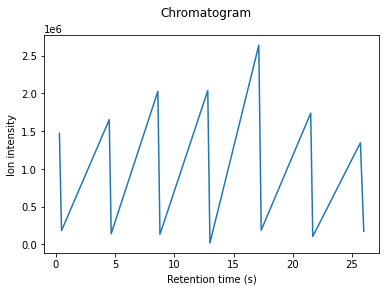

In [14]:
# plotting chromatogram (TIC) with MS1 spectra
plt.plot(chromatogram_data_1[0],chromatogram_data_1[1])
plt.xlabel('Retention time (s)')
plt.ylabel('Ion intensity')
plt.suptitle('Chromatogram')
plt.show()

In [15]:
# plotting interactive chromatogram (TIC) with MS1 spectra
fig = go.Figure(data=go.Scatter(x=chromatogram_data_1[0],y=chromatogram_data_1[1]))
fig.update_layout(hovermode="x")
fig.update_layout(
    title={
        'text': "Chromatogram",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Retention time (s)",
    yaxis_title="Intensity",
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="linear"
    )
)

In [56]:
from plotly.subplots import make_subplots
from ipywidgets import interact
import ipywidgets as widgets

fig1 = make_subplots(rows=2, cols=1, subplot_titles=["Chromatogram","MS spectrum"])

trace1 = go.Scatter(x = chromatogram_data_1[0],y = chromatogram_data_1[1],name = 'chromatogram')
trace2 = go.Scatter(x = spectrum_data_1[0],y = spectrum_data_1[1],name = 'MS Spectrum',)
fig1.add_trace(trace1, 1, 1)
fig1.add_trace(trace2, 2, 1)
fig1.update_layout(hovermode="x")

num_spectra = int(exp_filtered.getNrSpectra())

def update (MS=0):
            spectrum_data_1 = exp_filtered.getSpectrum(MS).get_peaks()
            fig1.data[1]["x"] = spectrum_data_1[0]
            fig1.data[1].y = spectrum_data_1[1]
            fig1.layout.xaxis.range = [5,10]
            fig1.show()
            
interact(update,MS = widgets.IntSlider(min=0, max=num_spectra-1, step=1, value=0))



interactive(children=(IntSlider(value=0, description='MS', max=13), Output()), _dom_classes=('widget-interact'…

<function __main__.update(MS=0)>

In [53]:
help (widgets.IntSlider)

Help on class IntSlider in module ipywidgets.widgets.widget_int:

class IntSlider(_BoundedInt)
 |  IntSlider(*args, **kwargs)
 |  
 |  Slider widget that represents an integer bounded from above and below.
 |  
 |  Method resolution order:
 |      IntSlider
 |      _BoundedInt
 |      _Int
 |      ipywidgets.widgets.widget_description.DescriptionWidget
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.valuewidget.ValueWidget
 |      ipywidgets.widgets.widget_core.CoreWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, value=None, min=None, max=None, step=None, **kwargs)
 |      Parameters
 |      ----------
 |      value: integer
 |          The initial value.
 |      min: integer
 |          The lower limit for the value.
 |      max: integer
 |          The

In [19]:
from plotly.subplots import make_subplots
from ipywidgets import interact
import ipywidgets as widgets

fig = make_subplots(rows=2, cols=1)

exp = MSExperiment()
MzMLFile().load("test.mzML", exp)

chromatogram_data = exp.getChromatogram(0).get_peaks()
spectrum_data = exp.getSpectrum(0).get_peaks()

trace1 = go.Scatter(x = chromatogram_data[0],y = chromatogram_data[1],name = 'chromatogram',)
trace2 = go.Scatter(x = spectrum_data[0],y = spectrum_data[1],name = 'MS Spectrum',)
fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 2, 1)

num_spectra = int(exp_filtered.getNrSpectra())

def update (b=0):
    if b =='MS1':
        def update(MS1_Spectra =0):
            spectrum_data = exp.getSpectrum(MS1_Spectra).get_peaks()
            fig.data[1].x = spectrum_data[0]
            fig.data[1].y = spectrum_data[1]
            fig.layout.xaxis.range = [5,10]
            fig.show()
            
interact(update,MS1_Spectra = widgets.IntSlider(min=-0, max=num_spectra-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='b', max=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.update(b=0)>

For MS2 spectra we can also create a different file and follow the same steps as MS1 data

In [17]:
exp_in = MSExperiment()
exp_out = MSExperiment()

MzMLFile().load("test.mzML", exp_in)

chromatogram = MSChromatogram()

spectra_list = list()
chr_rt = list()
chr_i = list()

for s in exp.getSpectra():
    ms_level = s.getMSLevel()
    if ms_level == 2:
        spectra_list.append(s)
        
        rt = s.getRT()
        i = np.max(s.get_peaks()[1])
        
        chr_rt.append(rt)
        chr_i.append(i)
        
chromatogram.set_peaks([chr_rt, chr_i])

exp_out.setSpectra(spectra_list)
exp_out.addChromatogram(chromatogram)

MzMLFile().store("filtered_ms2.mzML", exp_out)

BPC calculation

In [23]:
#Imports Necessary Tools for Widgets in Plotly
from plotly.subplots import make_subplots
from ipywidgets import interact
import ipywidgets as widgets

In [24]:
#Makes Figure 1 of MS1 Data
fig1 = make_subplots(rows=2, cols=1)
exp_filtered_1 = MSExperiment()
MzMLFile().load("filtered_ms1.mzML", exp_filtered_1)
chromatogram_data_1 = exp_filtered_1.getChromatogram(0).get_peaks()
spectrum_data_1 = exp_filtered_1.getSpectrum(0).get_peaks()
trace1 = go.Scatter(x = chromatogram_data_1[0],y = chromatogram_data_1[1],name = 'chromatogram',)
trace2 = go.Scatter(x = spectrum_data_1[0],y = spectrum_data_1[1],name = 'MS Spectrum',)
fig1.add_trace(trace1, 1, 1)
fig1.add_trace(trace2, 2, 1)

#Makes Figure 2 of MS2 Data
fig2 = make_subplots(rows=2, cols=1)
exp_filtered_2 = MSExperiment()
MzMLFile().load("filtered_ms2.mzML", exp_filtered_2)
chromatogram_data_2 = exp_filtered_2.getChromatogram(0).get_peaks()
spectrum_data_2 = exp_filtered_2.getSpectrum(0).get_peaks()
trace3 = go.Scatter(x = chromatogram_data_2[0],y = chromatogram_data_2[1],name = 'MS2 chromatogram', visible = True,)
trace4 = go.Scatter(x = spectrum_data_2[0],y = spectrum_data_2[1],name = 'MS 2 Spectrum', visible = True,)
fig2.add_trace(trace3, 1, 1)
fig2.add_trace(trace4, 2, 1)

#Counts Spectra to Determine Slider Boundaries
num_spectra_1 = int(exp_filtered_1.getNrSpectra())
num_spectra_2 = int(exp_filtered_2.getNrSpectra())

#Makes Figure 3 of MS1 and MS2 Overlapped data
fig3 = make_subplots(rows=2, cols=1)
fig3.add_trace(trace3, 1, 1)
fig3.add_trace(trace4, 2, 1)
fig3.add_trace(trace1, 1, 1)
fig3.add_trace(trace2, 2, 1)

#Defines Spectra layout via slider value for MS1
def update1 (b=0):
    if b =='MS1':
        def update(MS1_Spectra =0):
            spectrum_data_1 = exp_filtered_1.getSpectrum(MS1_Spectra).get_peaks()
            fig1.data[1]["x"] = spectrum_data_1[0]
            fig1.data[1].y = spectrum_data_1[1]
            fig1.layout.xaxis.range = [5,10]
            fig1.show()
        interact(update,MS1_Spectra = widgets.IntSlider(min=-0, max=num_spectra-1, step=1, value=0))

#Defines Spectra layout via slider value for MS2    
    if b == 'MS2':
        def update3(MS2_Spectra=0):
            spectrum_data_2 = exp_filtered_2.getSpectrum(MS2_Spectra).get_peaks()
            fig2.data[1]["x"] = spectrum_data_2[0]
            fig2.data[1].y = spectrum_data_2[1]
            fig2.layout.xaxis.range = [5,10]
            fig2.show()
        interact(update3,MS2_Spectra= widgets.IntSlider(min=0, max=num_spectra_2-1, step=1, value=0))
        
 #Displays Figure 3 with no slider ***WILL EDIT IF MIKE WANTS SLIDER BUT NEED TO KNOW BOUNDS***  
    if b == 'MS1 & MS2':
        fig3.show()
        
#Defines Dropdown Widget Options
interact(update1,b= widgets.Dropdown(
    options=['MS1', 'MS2', 'MS1 & MS2'],
    value='MS1',
    description='MS View:',
    disabled=False,
))

interactive(children=(Dropdown(description='MS View:', options=('MS1', 'MS2', 'MS1 & MS2'), value='MS1'), Outp…

<function __main__.update1(b=0)>